## Replace this with your name and Section

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 4
Due 11/4/2024 by 5p

### Problem 1
Write a function ```greaterThan(A, lower_lim)``` that takes as an argument a numpy array A and a number lower_lim and returns an array with every entry less than or equal to lower_lim replaced by zero. That is to say, only the numbers strictly greater than lower_lim remain, the rest are 0.

In [34]:
'''your code here'''
import numpy as np
def greaterThan(A, lower_lim):
    lim=lower_lim 
    
    return np.where(A>lim, A, 0)

In [4]:
A = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
B = np.array([[-1, 1], [2, -2], [0, 3]])
C = np.array([[101.1, 100, 99.9], [99.8, 100.1, 98.9], [103.2, 99, 98]])

In [35]:
greaterThan(A, 5)

array([0, 0, 0, 0, 0, 6, 7, 8, 9])

In [36]:
A = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
B = np.array([[-1, 1], [2, -2], [0, 3]])
C = np.array([[101.1, 100, 99.9], [99.8, 100.1, 98.9], [103.2, 99, 98]])

assert np.all(greaterThan(A, 5) == np.array([0, 0, 0, 0, 0, 6, 7, 8, 9]))
assert np.all(greaterThan(B, 0) == np.array([[0, 1], [2, 0], [0, 3]]))
assert np.all(greaterThan(C, 100) == np.array([[101.1, 0, 0], [0, 100.1, 0], [103.2, 0, 0]]))

print("You passed all the tests!")

You passed all the tests!


### Problem 2
Write a function ```subtractMean(A)``` that takes as an input the numpy array and returns the array with the mean of all the values subtracted from every element.

In [6]:
'''your code here'''
import numpy as np # imports numpy for the mean function
def subtractMean(A):
    mean= np.mean(A) # find the mean of the array
    changedA=[] #creates an empty list
    for x in A: #iterates for each value within the array
        changedA.append(x-mean) # adds x-mean to the empty list
    return changedA

In [7]:
subtractMean(A)

[-4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0]

If the tests below aren't passing, check the values of A, B, and C. These should be the same as in the test for Problem 1. If the values in these arrays have changed, why might that be?

In [8]:
assert np.isclose(subtractMean(A), np.array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])).all()
assert np.isclose(subtractMean(B), np.array([[-1.5,  0.5],[ 1.5, -2.5],[-0.5,  2.5]])).all()
assert np.isclose(subtractMean(C), np.array([[ 1.1,  0. , -0.1],[-0.2,  0.1, -1.1],[ 3.2, -1. , -2. ]])).all()

print("You passed all the tests!")


You passed all the tests!


### Problem 3

Write a function ```arrayEdges``` that takes as an input an array and returns a 1-D array of all the elements on the edges of the array starting at the upper left corner and working around clockwise. Do not repeat that first element. If the original array is not 2-D, print('Error') and return -1.

*Hint*: Get the shape of the array as height and width, calculate the perimeter (remember not to double count the corners), and make an array of zeros the size of the perimeter. Then fill that array.

*Hint 2*: The length of the shape of a 2-D array is 2.

*Hint 3*: ```dA = A.dtype``` is the data type of A. ```np.zeros().astype(dA)``` creates an array of that type (if A has strings, this will make an array of '0').

In [76]:
'''your code here'''
def arrayEdges(A):
    if len(A.shape) != 2:
        print('Error')
        return -1
    height, width=A.shape
    perimeter=(2 * (height+width)) - 4 #minus 4 for the 4 corners (no double counting here nosiree)
    dA = A.dtype
    zeros=np.zeros(perimeter).astype(dA)
    position=0
    #top row
    for column in range(width):
        zeros[position]=A[0, column]
        position +=1
    #right column
    for row in range (1, height-1):
        zeros[position]=A[row, width-1]
        position+=1
    #bottom row
    for column in range(width-1, -1, -1):
        zeros[position]=A[height-1, column]
        position+=1
    #left column
    for row in range(height-2,0,-1):
        zeros[position]=A[row, 0]
        position+=1
    return zeros

In [37]:
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
Y = np.array([['you', 'got', 'this'],['!','correct','problem']])
Z = np.array(['but','this','wont', 'work'])


In [77]:
arrayEdges(X)

array([1, 2, 3, 6, 9, 8, 7, 4])

In [78]:
'''Test your code'''

X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
Y = np.array([['you', 'got', 'this'],['!','correct','problem']])
Z = np.array(['but','this','wont', 'work'])

assert np.array(arrayEdges(X) == np.array([1, 2, 3, 6, 9, 8, 7, 4])).all()
assert np.array(arrayEdges(Y) == np.array(['you', 'got', 'this', 'problem', 'correct', '!'])).all()
assert arrayEdges(Z) == -1

print("You passed all the tests! (disregard that it says Error above...it's supposed to do that)")


Error
You passed all the tests! (disregard that it says Error above...it's supposed to do that)


## Palmer's Penguins

Below I've imported the Palmer's Penguins dataset, courtesy of Alison Horst's github. Fill in the blanks in Problem 4. You should add code cells below to write code to find the answers.

In [90]:
import pandas as pd

pp_df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv')
pp_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


### Problem 4

 1. How many penguins were recorded? 

  - 

 2. In terms of body mass, how big were the smallest and biggest penguins measured?

  - 
  - 

 3. What species of penguins were recorded and how many of each?

 - 
 - 
 -

In [91]:
'''your code here'''
#how many penguins?
len(pp_df)

344

In [110]:
#biggest and smallest penguins
min_weight=pp_df['body_mass_g'].min()
max_weight=pp_df['body_mass_g'].max()
min_weight, max_weight

(2700.0, 6300.0)

In [93]:
#species and counts
species_list, count = np.unique(pp_df['species'], return_counts = True)
counts_df = pd.DataFrame({'Species': species_list, 'Count': count})
counts_df

,Species,Count
0,Adelie,152
1,Chinstrap,68
2,Gentoo,124


### Problem 5

Plot a histogram of the body masses of penguins grouped by species. Make sure to include a title, axis labels, and a legend.

In [94]:
'''your code here'''
import matplotlib.pyplot as plt
import pandas as pd
species_weight=pp_df[['species', 'body_mass_g']]
ad_df=pp_df[pp_df['species']=='Adelie']
cs_df=pp_df[pp_df['species']=='Chinstrap']
gt_df=pp_df[pp_df['species']=='Gentoo']

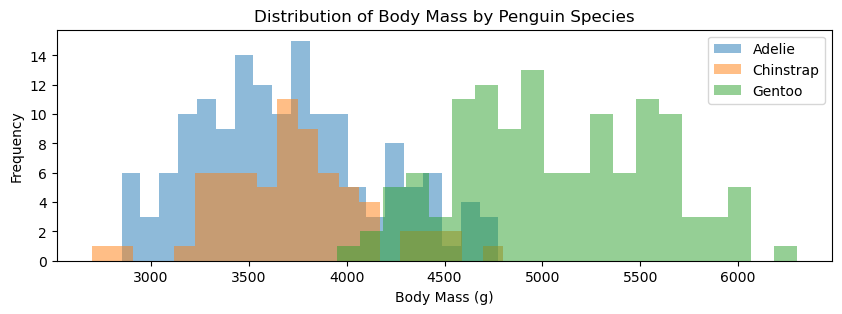

In [99]:
fig, ax = plt.subplots(1,1, figsize = (10, 3))
plot_opts = dict( #creates dictionary with settings that all plots can follow
     bins=20, 
     alpha=0.5)
ax.hist(ad_df['body_mass_g'], **plot_opts, label = 'Adelie')
ax.hist(cs_df['body_mass_g'], **plot_opts, label = 'Chinstrap')
ax.hist(gt_df['body_mass_g'], **plot_opts, label = 'Gentoo')
ax.set_xlabel('Body Mass (g)')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Body Mass by Penguin Species')
ax.legend()
plt.show()

### Challenge Problem

Write a function ```interleaveArrays``` that takes as arguments two numpy arrays A and B and return a new numpy array with the rows of A and B interleaved, starting with A. If you run out of rows from one matrix or the other complete the array with the remaining rows of the longer array.

If the two arrays do not have the same number of columns, print('Error: Shapes of arrays are not compatible.') and return -1
If the two arrays contain different data types, print('Error: Types of arrays are not compatible.') and return -2

Example:

```
G = np.array([[1, 2, 3], [4, 5, 6]])
H = np.array([[10, 20, 30], [100, 200, 300], [1000, 2000, 3000]])

interleave(G,H)
```
returns
```
array([[1,2,3], [10,20,30], [4, 5, 6], [100, 200, 300], [1000, 2000, 3000]])
```

In [113]:
'''your code here'''
def interleaveArrays(A, B):
    Aheight, Awidth=A.shape
    Bheight, Bwidth=B.shape
    max_length = max(Aheight, Bheight)
    if Awidth != Bwidth:
        print('Error: Shapes of arrays are not compatible.')
        return -1
    if A.dtype != B.dtype:
        print('Error: Types of arrays are not compatible.')
        return -2
    length=Aheight+Bheight
    empty = np.empty((length, A.shape[1]), dtype=A.dtype)
    posA=0
    posB=0
    for row in range(max_length):
        if posA<Aheight:
            empty[row * 2] = A[posA]
            posA+=1
        if posB<Bheight:
            empty[row * 2 + 1] = B[posB]
            posB+=1
    return empty


In [81]:
G = np.array([[1, 2, 3], [4, 5, 6]])
H = np.array([[10, 20, 30], [100, 200, 300], [1000, 2000, 3000]])

In [114]:
interleaveArrays(H, G)

array([[  10,   20,   30],
       [   1,    2,    3],
       [ 100,  200,  300],
       [   4,    5,    6],
       [1000, 2000, 3000]])